<a href="https://colab.research.google.com/github/Venkata-Sai-Prakash-Yerramsetti/CMPE257-Fall23-Venkata-Sai-Prakash-Yerramsetti/blob/homework-3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np



In [21]:
def init_weigh(x ,y, hidden_layers_network):
    weigh1 = np.random.randn(hidden_layers_network,x) * 0.01
    bias1 = np.zeros(shape=(hidden_layers_network, 1))
    weigh2 = np.random.randn(y,hidden_layers_network) * 0.01
    bias2 = np.zeros(shape=(y, 1))
    parameters_of_function_required_imp = {"weigh1": weigh1, "bias1": bias1, "weigh2": weigh2, "bias2": bias2}

    return parameters_of_function_required_imp

In [22]:
def tanh_activation_function(Z):
    """
    Compute the derivative of tanh activation.
    """
    A = np.tanh(Z)
    dZ = 1 - np.power(A, 2)
    return dZ

def forward_propogation(X, parameters_of_function_required_imp):
    """
    Perform forward propagation.
    """
    weigh1 = parameters_of_function_required_imp["weigh1"]
    bias1 = parameters_of_function_required_imp["bias1"]
    weigh2 = parameters_of_function_required_imp["weigh2"]
    bias2 = parameters_of_function_required_imp["bias2"]
    K1 = np.dot(weigh1, X) + bias1
    B1 = tanh_activation_function(K1)
    K2 = np.dot(weigh2, B1) + bias2
    B2 = tanh_activation_function(K2)

    cached_values = {"K1": K1, "B1": B1, "K2": K2, "B2": B2}
    return B2, cached_values



In [23]:
def backward_propagation_function(parameters_of_function_required_imp, cached_values, X, Y):
    m = X.shape[1]
    weigh1 = parameters_of_function_required_imp["weigh1"]
    bias1 = parameters_of_function_required_imp["bias1"]
    weigh2 = parameters_of_function_required_imp["weigh2"]
    bias2 = parameters_of_function_required_imp["bias2"]
    B1, B2 = cached_values["B1"], cached_values["B2"]

    dK2 = B2 - Y
    dweigh2 = np.dot(dK2, B1.T) / m
    dbias2 = np.sum(dK2, axis=1, keepdims=True) / m

    dK1 = np.dot(weigh2.T, dK2) * tanh_activation_function(cached_values["K1"])
    dweigh1 = np.dot(dK1, X.T) / m
    dbias1 = np.sum(dK1, axis=1, keepdims=True) / m

    gradient_value_required = {"dweigh1": dweigh1, "dbias1": dbias1, "dweigh2": dweigh2, "dbias2": dbias2}

    return gradient_value_required



In [24]:
def computational_cost_function(B2, Y):
    m = Y.shape[1]
    cost = np.sum((B2 - Y) ** 2)
    return cost

In [25]:
def updation_of_the_parameters_of_the_function(parameters_of_function_required_imp, gradient_value_required, required_learning_rate):
    """
    Update the parameters_of_function_required_imp using gradient descent.
    """
    weigh1 = parameters_of_function_required_imp["weigh1"]
    bias1 = parameters_of_function_required_imp["bias1"]
    weigh2 = parameters_of_function_required_imp["weigh2"]
    bias2 = parameters_of_function_required_imp["bias2"]
    dweigh1, dbias1, dweigh2, dbias2 = gradient_value_required
    dweigh1 = gradient_value_required["dweigh1"]
    dbias1 = gradient_value_required["dbias1"]
    dweigh2 = gradient_value_required["dweigh2"]
    dbias2 = gradient_value_required["dbias2"]

    weigh1 -= required_learning_rate * dweigh1
    bias1 -= required_learning_rate * dbias1
    weigh2 -= required_learning_rate * dweigh2
    bias2 -= required_learning_rate * dbias2

    updated_parameters_of_function_required_imp = {"weigh1": weigh1, "bias1": bias1, "weigh2": weigh2, "bias2": bias2}

    return updated_parameters_of_function_required_imp

In [26]:

def neural_network_model_function(X, Y, size_of_hidden_layer_required, required_learning_rate, number_of_iterations_required):
    x=X.shape[0]
    y=Y.shape[0]
    parameters_of_function_required_imp = init_weigh(x,y,size_of_hidden_layer_required)
    for i in range(number_of_iterations_required):
        B2, cached_values = forward_propogation(X, parameters_of_function_required_imp)
        cost = computational_cost_function(B2, Y)
        gradient_value_required = backward_propagation_function(parameters_of_function_required_imp, cached_values, X, Y)
        parameters_of_function_required_imp = updation_of_the_parameters_of_the_function(parameters_of_function_required_imp, gradient_value_required, required_learning_rate)

        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return parameters_of_function_required_imp

In [27]:
X=np.array([[2,0.1],[3,0.4]])
Y=np.array([[1]])
fin_x = X.shape[0]
fin_h = 4
fin_y = Y.shape[0]
print(fin_x)
print(fin_y)

trained_parameters_of_required_function = neural_network_model_function(X, Y, fin_h, 0.01, 20)
print(trained_parameters_of_required_function)

2
1
Cost after iteration 0: 1.7304121279942742e-05
{'weigh1': array([[ 0.01147166,  0.00732791],
       [-0.01426302, -0.01090692],
       [-0.00109026, -0.01252111],
       [ 0.00120411,  0.00067989]]), 'bias1': array([[-8.32637091e-06],
       [-6.42052480e-06],
       [-8.79465226e-06],
       [-6.24140548e-06]]), 'weigh2': array([[-0.01460229, -0.011203  , -0.01543657, -0.01086079]]), 'bias2': array([[0.00055954]])}


Task 3

In [28]:
import pandas as pd
import numpy as np
def proper_df_of_the_function(input_df):
  df = []
  N, M = input_df.shape
  for i in range(N):
    string = input_df.iloc[i]
    list_at_i = [float(x) for x in string[0].split()]
    df.append(list_at_i)
  df = pd.DataFrame(df, columns = get_lables_of_function())
  return df


def get_lables_of_function():
  column_names_from_dataset = ['label']
  column_names_from_dataset.extend([str(x) for x in range(256)])
  return column_names_from_dataset


def calculate_intensitY_1main_function(df):
    value_of_the_pixels = df.iloc[:, 1:].values

    mean_absolute_intensity = np.mean(np.abs(value_of_the_pixels), axis=1)
    df['x1'] = mean_absolute_intensity
    return df

def calculate_symmetry(df):
    value_of_the_pixels = df.iloc[:, 1:].values
    n = value_of_the_pixels.shape[1]
    symm_of_final_result = np.sum(np.abs(value_of_the_pixels - np.flip(value_of_the_pixels, axis=1)), axis=1) / n
    df['x2'] = symm_of_final_result
    return df

def cleaned_df(file_path):
  df_train_digits_data = pd.read_csv(file_path)
  df_train_digits_data = proper_df_of_the_function(df_train_digits_data)
  filter_labels = [1.0, 5.0]
  filtered_df_train_digits_data = df_train_digits_data[df_train_digits_data['label'].isin(filter_labels)]
  binarY_1filtered_df_train_digits_data = filtered_df_train_digits_data.copy()
  binarY_1filtered_df_train_digits_data['label'] = binarY_1filtered_df_train_digits_data['label'].replace(5.0, -1.0)
  return binarY_1filtered_df_train_digits_data

In [29]:
from google.colab import drive
drive.mount('/content/drive')
binary_filtered_df_train_digits_data = cleaned_df('/content/drive/MyDrive/datasets/ZipDigits.train')
binary_filtered_df_train_digits_data = binary_filtered_df_train_digits_data.rename(columns={'label': 'y'})
binary_filtered_df_train_digits_data = calculate_intensitY_1main_function(binary_filtered_df_train_digits_data)
binary_filtered_df_train_digits_data = calculate_symmetry(binary_filtered_df_train_digits_data)
trained_dataframe = binary_filtered_df_train_digits_data[['x1', 'x2', 'y']]
positive_points_from_df = trained_dataframe[trained_dataframe['y'] == 1.0]
negative_points_from_df = trained_dataframe[trained_dataframe['y'] == -1.0]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_1 = trained_dataframe[['x1', 'x2']].values
Y_1 = trained_dataframe['y'].values
X_1train, X_1test, Y_1train, Y_1test = train_test_split(X_1, Y_1, test_size=0.2, random_state=12)
X_1train = X_1train.T
X_1test = X_1test.T
Y_1train = Y_1train.reshape(1, -1)
Y_1test = Y_1test.reshape(1, -1)
print(X_1train)
print(Y_1train)

[[0.92780078 0.92839844 0.94530469 ... 0.87771094 0.91462109 0.95035938]
 [0.17357822 0.33947392 0.2178156  ... 0.37568647 0.33644841 0.21274988]]
[[ 1.  1.  1. ... -1.  1.  1.]]


In [31]:
size_of_hidden_layer_required = 4
required_learning_rate = 0.01
number_of_iterations_required = 2*10**6
def main_neural_network_model_function_sgd_function(X, Y, size_of_hidden_layer_required, required_learning_rate, number_of_iterations_required):
    input_size_of_data = X.shape[0]
    output_size_of_data = Y.shape[0]
    costs = []
    parameters_of_function_required_imp = init_weigh(input_size_of_data, output_size_of_data, size_of_hidden_layer_required)

    for i in range(number_of_iterations_required):
        random_index_from_data = np.random.randint(0, X.shape[1])
        X_1sample_from_data = X[:, random_index_from_data].reshape(-1, 1)
        Y_1sample_from_data = Y[:, random_index_from_data].reshape(-1, 1)
        B2, cached_values = forward_propogation(X_1sample_from_data, parameters_of_function_required_imp)
        cost = computational_cost_function(B2, Y_1sample_from_data)
        costs.append(cost)
        gradient_value_required = backward_propagation_function(parameters_of_function_required_imp, cached_values, X_1sample_from_data, Y_1sample_from_data)
        parameters_of_function_required_imp = updation_of_the_parameters_of_the_function(parameters_of_function_required_imp, gradient_value_required, required_learning_rate)
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return parameters_of_function_required_imp,costs
trained_parameters_of_required_function_sgd ,costs  = main_neural_network_model_function_sgd_function(X_1train, Y_1train, size_of_hidden_layer_required, required_learning_rate, number_of_iterations_required)
def predict(parameters_of_function_required_imp, X):
    B2, _ = forward_propogation(X, parameters_of_function_required_imp)
    predictions_of_the_values = (B2 > 0.5).astype(int)
    return predictions_of_the_values
predictions_of_the_values = predict(trained_parameters_of_required_function_sgd, X_1test)
accuracy = np.mean(predictions_of_the_values == Y_1test)
print("Test Accuracy with Stochastic Gradient Descent:", accuracy)

Streaming output truncated to the last 5000 lines.
Cost after iteration 1500100: 0.9238054941326633
Cost after iteration 1500200: 0.5974092199073577
Cost after iteration 1500300: 2.2585049451648933
Cost after iteration 1500400: 0.34267034191508683
Cost after iteration 1500500: 2.1516902156800577
Cost after iteration 1500600: 0.999999913715362
Cost after iteration 1500700: 1.9536221071294901
Cost after iteration 1500800: 2.263982035582274
Cost after iteration 1500900: 0.25337847654898044
Cost after iteration 1501000: 1.05714753771832
Cost after iteration 1501100: 0.34845722991622735
Cost after iteration 1501200: 0.3654613459025841
Cost after iteration 1501300: 2.163775211569594
Cost after iteration 1501400: 0.9996761386302478
Cost after iteration 1501500: 0.39811075560758524
Cost after iteration 1501600: 0.3239069343772626
Cost after iteration 1501700: 2.0778308918040316
Cost after iteration 1501800: 2.175174244155695
Cost after iteration 1501900: 1.0000499447396212
Cost after iteration

In [32]:
def predict(parameters_of_function_required_imp, X):
    B2, _ = forward_propogation(X, parameters_of_function_required_imp)
    print(B2)
    predictions_of_the_values = (B2 > 0).astype(int)
    return predictions_of_the_values
predictions_of_the_values = predict(trained_parameters_of_required_function_sgd, X_1test)

print(predictions_of_the_values)
accuracy = np.mean(predictions_of_the_values == Y_1test)
print("Test Accuracy with Stochastic Gradient Descent:", accuracy)

[[2.47891953e-01 3.44881761e-01 2.26596311e-01 3.15574797e-01
  3.42532228e-01 3.46134556e-01 3.49460546e-01 3.43967049e-01
  9.77244391e-02 3.50251065e-01 3.50706040e-01 3.50958309e-01
  2.32670648e-02 3.36056547e-01 3.50009190e-01 3.33426352e-01
  7.91147076e-04 2.68496825e-01 2.84303012e-01 2.53389361e-01
  2.98827561e-01 3.50549389e-01 3.34630734e-01 2.81166350e-01
  4.59204302e-07 3.39859574e-01 2.78086326e-01 3.51024642e-01
  3.45839284e-01 3.35589282e-01 3.49209360e-01 3.38817801e-01
  3.50856081e-01 3.50732336e-01 3.48116783e-01 3.50993010e-01
  2.66440576e-02 3.23442894e-01 3.51002919e-01 3.50699624e-01
  3.29982625e-01 3.49433385e-01 3.33560484e-01 3.51054324e-01
  3.36930894e-01 7.83869120e-03 2.58160974e-02 1.35305137e-01
  0.00000000e+00 9.59309455e-02 3.50565267e-01 3.51052996e-01
  1.97858108e-01 7.28639121e-02 1.28680598e-03 2.39520853e-01
  2.12706279e-03 3.51054163e-01 2.82609215e-01 3.02856622e-01
  0.00000000e+00 2.33654819e-01 2.95304441e-01 2.10699793e-01
  3.5105

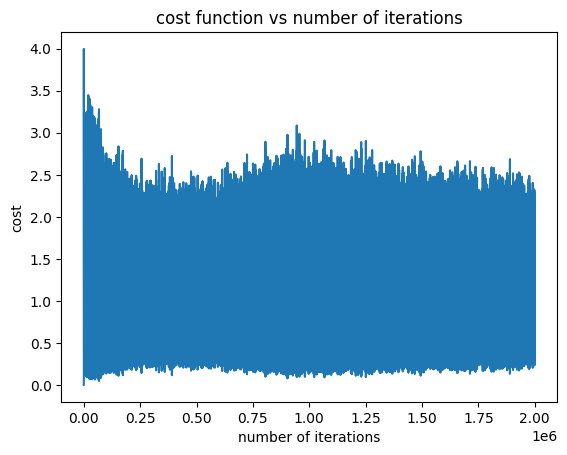

In [33]:
import matplotlib.pyplot as plt
plt.plot(range(len(costs)), costs)
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('cost function vs number of iterations')
plt.show()

Part  5

In [34]:
predictions_of_the_values_after_trained = predict(trained_parameters_of_required_function_sgd, X_1test)
accuracy_of_the_test = np.mean(predictions_of_the_values_after_trained == Y_1test)
print("Test Accuracy:", accuracy_of_the_test)

[[2.47891953e-01 3.44881761e-01 2.26596311e-01 3.15574797e-01
  3.42532228e-01 3.46134556e-01 3.49460546e-01 3.43967049e-01
  9.77244391e-02 3.50251065e-01 3.50706040e-01 3.50958309e-01
  2.32670648e-02 3.36056547e-01 3.50009190e-01 3.33426352e-01
  7.91147076e-04 2.68496825e-01 2.84303012e-01 2.53389361e-01
  2.98827561e-01 3.50549389e-01 3.34630734e-01 2.81166350e-01
  4.59204302e-07 3.39859574e-01 2.78086326e-01 3.51024642e-01
  3.45839284e-01 3.35589282e-01 3.49209360e-01 3.38817801e-01
  3.50856081e-01 3.50732336e-01 3.48116783e-01 3.50993010e-01
  2.66440576e-02 3.23442894e-01 3.51002919e-01 3.50699624e-01
  3.29982625e-01 3.49433385e-01 3.33560484e-01 3.51054324e-01
  3.36930894e-01 7.83869120e-03 2.58160974e-02 1.35305137e-01
  0.00000000e+00 9.59309455e-02 3.50565267e-01 3.51052996e-01
  1.97858108e-01 7.28639121e-02 1.28680598e-03 2.39520853e-01
  2.12706279e-03 3.51054163e-01 2.82609215e-01 3.02856622e-01
  0.00000000e+00 2.33654819e-01 2.95304441e-01 2.10699793e-01
  3.5105

In [35]:
print(X_1train.shape[1])
k=X_1train.shape[1]
number_of_the_batches_required = k//32
print(number_of_the_batches_required)

1248
39


HP-2

In [36]:
def gradient_descent_on_a_sample_dataset(X, Y, size_of_hidden_layer_required, required_learning_rate, Number_of_epochs_required, size_of_the_batch_required):
    input_size_of_data = X.shape[0]
    output_size_of_data = Y.shape[0]
    costs = []
    parameters_of_function_required_imp = init_weigh(input_size_of_data, output_size_of_data, size_of_hidden_layer_required)
    Number_of_batches_required = len(X.T) // size_of_the_batch_required

    for epoch in range(Number_of_epochs_required):
        diff_ways = np.random.permutation(len(X.T))
        X_1shuffled = X[:, diff_ways]
        Y_1shuffled = Y[:, diff_ways]

        for batch in range(Number_of_batches_required):
            start_idx = batch * size_of_the_batch_required
            end_idx = (batch + 1) * size_of_the_batch_required
            X_1batch = X_1shuffled[:, start_idx:end_idx]
            Y_1batch = Y_1shuffled[:, start_idx:end_idx]
            B2, cached_values = forward_propogation(X_1batch, parameters_of_function_required_imp)
            cost = computational_cost_function(B2, Y_1batch)
            costs.append(cost / size_of_the_batch_required)
            gradient_value_required = backward_propagation_function(parameters_of_function_required_imp, cached_values, X_1batch, Y_1batch)
            parameters_of_function_required_imp = updation_of_the_parameters_of_the_function(parameters_of_function_required_imp, gradient_value_required, required_learning_rate)

        if epoch % 100 == 0:
            print(f"Cost after epoch {epoch}: {costs[-1]}")

    return parameters_of_function_required_imp, costs
size_of_hidden_layer_required = 4
required_learning_rate = 0.01
Number_of_epochs_required = 2*10**4
size_of_the_batch_required = 32
trained_parameters_of_required_function_mini_batch, costs_mini_batch = gradient_descent_on_a_sample_dataset(X_1train, Y_1train, size_of_hidden_layer_required, required_learning_rate, Number_of_epochs_required, size_of_the_batch_required)
print(costs_mini_batch)


Cost after epoch 0: 1.0586714322024948
Cost after epoch 100: 0.7789597527693488
Cost after epoch 200: 0.9036863090200516
Cost after epoch 300: 0.6774277902889054
Cost after epoch 400: 0.7477599548713991
Cost after epoch 500: 0.876747410449304
Cost after epoch 600: 1.283774035515782
Cost after epoch 700: 0.9778063426166284
Cost after epoch 800: 0.8785018523649126
Cost after epoch 900: 1.0980556767501595
Cost after epoch 1000: 0.8868588349460838
Cost after epoch 1100: 0.8403303640381546
Cost after epoch 1200: 0.9436406700758
Cost after epoch 1300: 0.8410194780005804
Cost after epoch 1400: 0.7158852010671283
Cost after epoch 1500: 1.1199984182079483
Cost after epoch 1600: 0.8199425011679096
Cost after epoch 1700: 0.9303280228663278
Cost after epoch 1800: 0.8698531224698178
Cost after epoch 1900: 0.8261413033848493
Cost after epoch 2000: 0.9933962882738383
Cost after epoch 2100: 0.8495577691284495
Cost after epoch 2200: 1.03650975274859
Cost after epoch 2300: 0.9540425752845091
Cost after 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



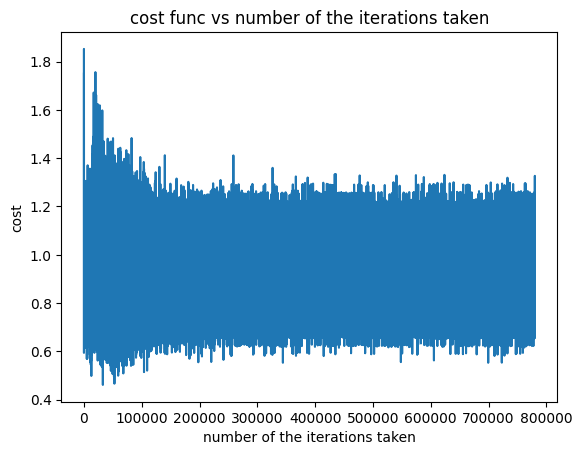

In [37]:
print(costs_mini_batch)
import matplotlib.pyplot as plt
plt.plot(range(len(costs_mini_batch)), costs_mini_batch)
plt.xlabel('number of the iterations taken')
plt.ylabel('cost')
plt.title('cost func vs number of the iterations taken')
plt.show()